<!--NAVIGATION-->
< [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb) | [Contents](Index.ipynb) | [Sorting Arrays](02.08-Sorting.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.07-Fancy-Indexing.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>


# Fancy Indexing

# 高级索引

> In the previous sections, we saw how to access and modify portions of arrays using simple indices (e.g., ``arr[0]``), slices (e.g., ``arr[:5]``), and Boolean masks (e.g., ``arr[arr > 0]``).
In this section, we'll look at another style of array indexing, known as *fancy indexing*.
Fancy indexing is like the simple indexing we've already seen, but we pass arrays of indices in place of single scalars.
This allows us to very quickly access and modify complicated subsets of an array's values.

在前面的小节中，我们学习了如何获取和修改数组的元素或部分元素，我们可以通过简单索引（例如`arr[0]`），切片（例如`arr[:5]`）和布尔遮盖（例如`arr[arr > 0]`）来实现。本节来介绍另外一种数组索引的方式，被称为*高级索引*。高级索引语法上和前面我们学习到的简单索引很像，区别只是它不是传递标量参数作为索引值，而是传递数组参数作为索引值。这中方式能让我们很迅速的获取和修改复杂数组或子数组的元素值。

## Exploring Fancy Indexing

## 初探高级索引

> Fancy indexing is conceptually simple: it means passing an array of indices to access multiple array elements at once.
For example, consider the following array:

高级索引在概念层面非常简单：传递一个数组作为索引值参数，使得用户能一次性的获取或修改多个数组元素值。例如向下面的数组：

In [1]:
import numpy as np
rand = np.random.RandomState(42)

x = rand.randint(100, size=10)
print(x)

[51 92 14 71 60 20 82 86 74 74]


> Suppose we want to access three different elements. We could do it like this:

加入我们需要访问其中三个不同的元素。我们可以这样做：

In [2]:
[x[3], x[7], x[2]]

[71, 86, 14]

> Alternatively, we can pass a single list or array of indices to obtain the same result:

还有一种方法，我们以一个数组的方式将这些元素的索引传递给数组，也可以获得相同的结果：

In [3]:
ind = [3, 7, 4]
x[ind]

array([71, 86, 60])

> When using fancy indexing, the shape of the result reflects the shape of the *index arrays* rather than the shape of the *array being indexed*:

当使用高级索引时，结果数组的形状取决于*索引数组*的形状而不是*被索引数组*的形状：

In [5]:
ind = np.array([[3, 7],
                [4, 5]]) # 索引数组是一个2x2数组，结果也将会是一个2x2数组
x[ind]

array([[71, 86],
       [60, 20]])

> Fancy indexing also works in multiple dimensions. Consider the following array:

高级索引也支持多维数组。例如：

In [6]:
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

> Like with standard indexing, the first index refers to the row, and the second to the column:

就像普通索引一样，第一个参数代表行，第二个参数代表列：

In [7]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

> Notice that the first value in the result is ``X[0, 2]``, the second is ``X[1, 1]``, and the third is ``X[2, 3]``.
The pairing of indices in fancy indexing follows all the broadcasting rules that were mentioned in [Computation on Arrays: Broadcasting](02.05-Computation-on-arrays-broadcasting.ipynb).
So, for example, if we combine a column vector and a row vector within the indices, we get a two-dimensional result:

结果中的第一个值是`x[0, 2]`，第二个值是`x[1, 1]`，第三个值是`x[2, 3]`。高级索引的多个维度组合方式也遵守广播的规则，请查阅[在数组上计算：广播](02.05-Computation-on-arrays-broadcasting.ipynb)。因此，例如，如果我们在上面的行索引数组中增加一个维度，结果将编程一个二维数组：

In [8]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

> Here, each row value is matched with each column vector, exactly as we saw in broadcasting of arithmetic operations.
For example:

这里，每个行索引都会匹配每个列的向量，就像我们在广播的算术运算中看到一样。例如：

In [9]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

> It is always important to remember with fancy indexing that the return value reflects the *broadcasted shape of the indices*, rather than the shape of the array being indexed.

记住高级索引结果的形状是*索引数组广播后的形状*而不是被索引数组形状，这点非常重要。

## Combined Indexing

## 组合索引

> For even more powerful operations, fancy indexing can be combined with the other indexing schemes we've seen:

结合我们前面学习过的索引方法，我们可以组合出更多更强大的操作：

In [10]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


> We can combine fancy and simple indices:

我们可以将高级索引和简单索引进行组合：

译者注，实际上这就是个广播，将标量广播成一个向量。

In [11]:
X[2, [2, 0, 1]]

array([10,  8,  9])

> We can also combine fancy indexing with slicing:

我们也可以将高级所以和切片进行组合：

In [12]:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

> And we can combine fancy indexing with masking:

还可以将高级索引和遮盖进行组合：

In [13]:
mask = np.array([1, 0, 1, 0], dtype=bool)
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

> All of these indexing options combined lead to a very flexible set of operations for accessing and modifying array values.

所有这些索引操作可以提供用户非常灵活的方式来获取和修改数组中的数据。

## Example: Selecting Random Points

## 例子：选择随机点

> One common use of fancy indexing is the selection of subsets of rows from a matrix.
For example, we might have an $N$ by $D$ matrix representing $N$ points in $D$ dimensions, such as the following points drawn from a two-dimensional normal distribution:

高级索引的一个通用应用场景就是从一个矩阵的行中选取子数据集。例如，我们有一个$N \multiply D$的矩阵，代表着一个$D$维平面上有$N$个点，例如下面的二维正态分布的点集合：

In [14]:
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rand.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

> Using the plotting tools we will discuss in [Introduction to Matplotlib](04.00-Introduction-To-Matplotlib.ipynb), we can visualize these points as a scatter-plot:

使用我们会在[第四章](04.00-Introduction-To-Matplotlib.ipynb)详细介绍的Matplotlib工具，我们可以在散点图上绘制这些点：

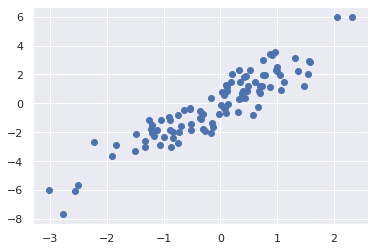

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # 设置图表风格，seaborn

plt.scatter(X[:, 0], X[:, 1]);

> Let's use fancy indexing to select 20 random points. We'll do this by first choosing 20 random indices with no repeats, and use these indices to select a portion of the original array:

下面我们使用高级索引来选择20个随机点。方法是先创建一个索引数组，里面的索引值是没有重复的，然后使用这个索引数组来选择点：

In [16]:
indices = np.random.choice(X.shape[0], 20, replace=False)
indices

array([34, 22, 77, 28, 80, 97, 23, 31,  4, 25, 55, 72,  5, 54, 71, 37, 62,
       69, 13,  9])

In [17]:
selection = X[indices]  # 使用高级索引
selection.shape

(20, 2)

> Now to see which points were selected, let's over-plot large circles at the locations of the selected points:

下面我们来看看那些点被选中，让我们上图的基础上将选中的点圈出来：

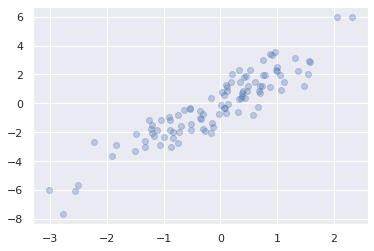

In [18]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3)
plt.scatter(selection[:, 0], selection[:, 1],
            facecolor='none', s=200);

> This sort of strategy is often used to quickly partition datasets, as is often needed in train/test splitting for validation of statistical models (see [Hyperparameters and Model Validation](05.03-Hyperparameters-and-Model-Validation.ipynb)), and in sampling approaches to answering statistical questions.

这种策略经常用来划分数据集，比如用来在验证统计模型正确性是需要的训练集和测试集划分（参见[超参数及模型验证](05.03-Hyperparameters-and-Model-Validation.ipynb)），还有就是在回答统计问题是进行取样抽象。

## Modifying Values with Fancy Indexing

## 使用高级索引修改数据

> Just as fancy indexing can be used to access parts of an array, it can also be used to modify parts of an array.
For example, imagine we have an array of indices and we'd like to set the corresponding items in an array to some value:

前面我们看到高级索引能够被用来获取一个数组的部分数据，实际上它还能用来修改选中部分的数据。例如，我们手头有一个索引的数组，我们想将这些索引上的数据修改为某个值：

In [19]:
x = np.arange(10)
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)

[ 0 99 99  3 99  5  6  7 99  9]


> We can use any assignment-type operator for this. For example:

我们可以使用任何赋值类型操作，例如：

In [20]:
x[i] -= 10
print(x)

[ 0 89 89  3 89  5  6  7 89  9]


> Notice, though, that repeated indices with these operations can cause some potentially unexpected results. Consider the following:

请注意下，如果索引数组中有重复的元素的话，这种修改操作可能会导致一个潜在的意料之外的结果。例如：

In [21]:
x = np.zeros(10)
x[[0, 0]] = [4, 6]
print(x)

[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


> Where did the 4 go? The result of this operation is to first assign ``x[0] = 4``, followed by ``x[0] = 6``.
The result, of course, is that ``x[0]`` contains the value 6.

4跑到哪里去了呢？这个操作首先赋值`x[0] = 4`，然后赋值`x[0] = 6`，因此最后`x[0]`的值是6。

> Fair enough, but consider this operation:

这个比较清晰，再看下面这个操作：

In [22]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

> You might expect that ``x[3]`` would contain the value 2, and ``x[4]`` would contain the value 3, as this is how many times each index is repeated. Why is this not the case?
Conceptually, this is because ``x[i] += 1`` is meant as a shorthand of ``x[i] = x[i] + 1``. ``x[i] + 1`` is evaluated, and then the result is assigned to the indices in x.
With this in mind, it is not the augmentation that happens multiple times, but the assignment, which leads to the rather nonintuitive results.

> So what if you want the other behavior where the operation is repeated? For this, you can use the ``at()`` method of ufuncs (available since NumPy 1.8), and do the following:

我们期望的结果可能是`x[3]`的值是2，而`x[4]`的值是3，因为这两个元素都多次执行了加法操作。但是为何结果不是呢？这是因为`x[i] += 1`是操作`x[i] = x[i] + 1`的简写，而`x[i] + 1`表达式的值已经计算好了，然后才被赋值给`x[i]`。因此，上面的操作不会被扩展为重复的运算，而是一次的赋值操作，造成了这种难以理解的结果。

如果我们真的需要这种重复的操作怎么办？对此，NumPy（版本1.8以上）提供了`at()`ufunc方法可以满足这个目的，如下：

In [23]:
x = np.zeros(10)
np.add.at(x, i, 1)
print(x)

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


> The ``at()`` method does an in-place application of the given operator at the specified indices (here, ``i``) with the specified value (here, 1).
Another method that is similar in spirit is the ``reduceat()`` method of ufuncs, which you can read about in the NumPy documentation.

`at()`方法不会预先计算表达式的值，而是每次运算时实时得到，方法在一个数组`x`中取得特定索引`i`，然后将其取得的值与最后一个参数`1`进行相应计算，这里是加法`add`。还有一个类似的方法是`reduceat()`方法，你可以从NumPy的文档中阅读它的说明。

## Example: Binning Data

## 例子：数据分组

> You can use these ideas to efficiently bin data to create a histogram by hand.
For example, imagine we have 1,000 values and would like to quickly find where they fall within an array of bins.
We could compute it using ``ufunc.at`` like this:

你可以使用上面的方法对数据进行高效分组，用于定义自己的直方图。例如，设想我们有1000个值，我们想将它们分别放入各个不同的数组分组中。我们可以使用`at`函数，例如：

In [24]:
np.random.seed(42)
x = np.random.randn(100) # 获得一个一维100个标准正态分布值

# 得到一个自定义的数据分组，区间-5至5平均取20个点，每个区间为一个数据分组
bins = np.linspace(-5, 5, 20)
counts = np.zeros_like(bins) # counts是x数值落入区间的计数

# 使用searchsorted，得到x每个元素在bins中落入的区间序号
i = np.searchsorted(bins, x)

# 使用at和add，对x元素在每个区间的元素个数进行计算
np.add.at(counts, i, 1)

> The counts now reflect the number of points within each bin–in other words, a histogram:

counts现在包含着每个数据分组中元素的个数，换句话来说，就是直方图：

/home/wangy/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Passing the drawstyle with the linestyle as a single string is deprecated since Matplotlib 3.1 and support will be removed in 3.3; please pass the drawstyle separately using the drawstyle keyword argument to Line2D or set_drawstyle() method (or ds/set_ds()).
  


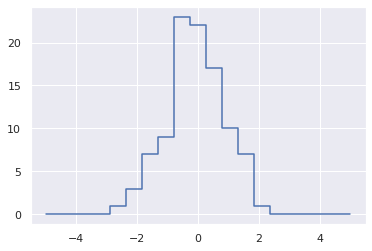

In [25]:
# 用图表展示结果
plt.plot(bins, counts, linestyle='steps');

> Of course, it would be silly to have to do this each time you want to plot a histogram.
This is why Matplotlib provides the ``plt.hist()`` routine, which does the same in a single line:

当然，如果每次要画直方图的时候，都要经过这么复杂的计算，很不方便。这也就是为什么Matplotlib提供了`plt.hist()`方法的原因，可以用一行代码完成上面操作：

```python
plt.hist(x, bins, histtype='step');
```

> This function will create a nearly identical plot to the one seen here.
To compute the binning, ``matplotlib`` uses the ``np.histogram`` function, which does a very similar computation to what we did before. Let's compare the two here:

这个函数会创建一个和上图基本完全一样的图形。Matplotlib使用`np.histogram`函数来计算数据分组，这个函数进行的计算和我们上面的代码非常接近。我们比较一下这两个方法：

In [26]:
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
22.7 µs ± 1.62 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)
Custom routine:
12.1 µs ± 426 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


> Our own one-line algorithm is several times faster than the optimized algorithm in NumPy! How can this be?
If you dig into the ``np.histogram`` source code (you can do this in IPython by typing ``np.histogram??``), you'll see that it's quite a bit more involved than the simple search-and-count that we've done; this is because NumPy's algorithm is more flexible, and particularly is designed for better performance when the number of data points becomes large:

我们自己写的一行代码比NumPy优化的算法要快出许多，这是因为什么？如果你深入到`np.histogram`函数的源代码进行阅读（你可以通过在IPython中输入`np.histogram??`来查阅）的时候，你会发现函数除了搜索和计数之外，还做了其他很多工作；这是因为NumPy的函数要更加灵活，而且当数据量变大的时候提供更好的性能：

In [27]:
x = np.random.randn(1000000)
print("NumPy routine:")
%timeit counts, edges = np.histogram(x, bins)

print("Custom routine:")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy routine:
67.2 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
Custom routine:
90.4 ms ± 1.62 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


> What this comparison shows is that algorithmic efficiency is almost never a simple question. An algorithm efficient for large datasets will not always be the best choice for small datasets, and vice versa (see [Big-O Notation](02.08-Sorting.ipynb#Aside:-Big-O-Notation)).
But the advantage of coding this algorithm yourself is that with an understanding of these basic methods, you could use these building blocks to extend this to do some very interesting custom behaviors.
The key to efficiently using Python in data-intensive applications is knowing about general convenience routines like ``np.histogram`` and when they're appropriate, but also knowing how to make use of lower-level functionality when you need more pointed behavior.

上面的结果说明当涉及到算法的性能时，永远不可能是一个简单的问题。对于大数据集来说一个很高效的算法，并不一定也适用于小数据集，反之亦然（参见[大O复杂度](02.08-Sorting.ipynb#Aside:-Big-O-Notation)）。我们这里使用自己的代码实现这个算法，目的是理解上面的基本函数，后续读者可以使用这些函数构建自己定义的各种功能。在数据科学应用中使用Python编写代码的关键在于，你能掌握NumPy提供的很方便的函数如`np.histogram`，你也能知道什么情况下适合使用它们，当需要更加定制的功能时你还能使用底层的函数自己实现相应的算法。

<!--NAVIGATION-->
< [Comparisons, Masks, and Boolean Logic](02.06-Boolean-Arrays-and-Masks.ipynb) | [Contents](Index.ipynb) | [Sorting Arrays](02.08-Sorting.ipynb) >

<a href="https://colab.research.google.com/github/jakevdp/PythonDataScienceHandbook/blob/master/notebooks/02.07-Fancy-Indexing.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
